In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize' : (26, 26)})

In [2]:
passes='HloVerifier,AllToAllDecomposer,OperandUpcaster,ResultCaster,RngExpander,RngBitGeneratorExpander,ComparisonExpander,ZeroSizedHloElimination,GpuScatterExpander,QrExpander,EighExpander,DynamicIndexSplitter,CallInliner,DotDecomposer,Convolution4DExpander,StableSortExpander,BFloat16Normalization,BatchNormExpander,LogisticExpander,ConditionalCanonicalizer,DynamicDimensionSimplifier,DynamicPadder,HloVerifier,ZeroSizedHloElimination,GatherExpander,ScatterExpander,AlgebraicSimplifier,BitcastDtypesExpander,DotDecomposer,DotMerger,SortSimplifier,TupleSimplifier,WhileLoopConstantSinking,WhileLoopSimplifier,ReshapeMover,HloConstantFolding,ConditionalSimplifier,RealImagExpander,TransposeFolding,HloCSE,HloDCE,WhileLoopTripCountAnnotator,AllReduceFolder,ReduceScatterCreator,AllReduceReassociate,AlgebraicSimplifier,AllGatherBroadcastReorder,HloVerifier,GpusolverRewriter,GpuConvRewriter,CudnnFusedConvRewriter,GpuConvPaddingLegalization,CudnnPadForConvolutions,CudnnVectorizeConvolutions,CallInliner,TupleSimplifier,AlgebraicSimplifier,HloConstantFolding,FlattenCallGraph,GpuLayoutAssignment,CublasPadForGemms,CublasPadForGemms,CublasPadForGemms,HloConstantFolding,HloVerifier,ReductionDegenerateDimRemover,ReductionLayoutNormalizer,ReductionDimensionGrouper,ReductionSplitter,GpuTreeReductionRewriter,AlgebraicSimplifier,TransposeFolding,GemmRewriter,GemmBroadcastFoldingRewriter,BFloat16Normalization,GpuConvAlgorithmPicker,TupleSimplifier,HloCSE,GemmAlgorithmPicker,VariadicOpSplitter,HloVerifier,GpuInstructionFusion,GpuInstructionFusion,FusionMerger,GpuMultiOutputFusion,HloCSE,HloDCE,GpuHorizontalLoopFusion,GpuHorizontalInputFusion,FusionBitcastLift,HloCSE,HloDCE,AllGatherCombiner,AllReduceCombiner,ReduceScatterCombiner,CollectivesScheduleLinearizer,AlgebraicSimplifier'

In [3]:
wordcount = Counter(passes.split(','))

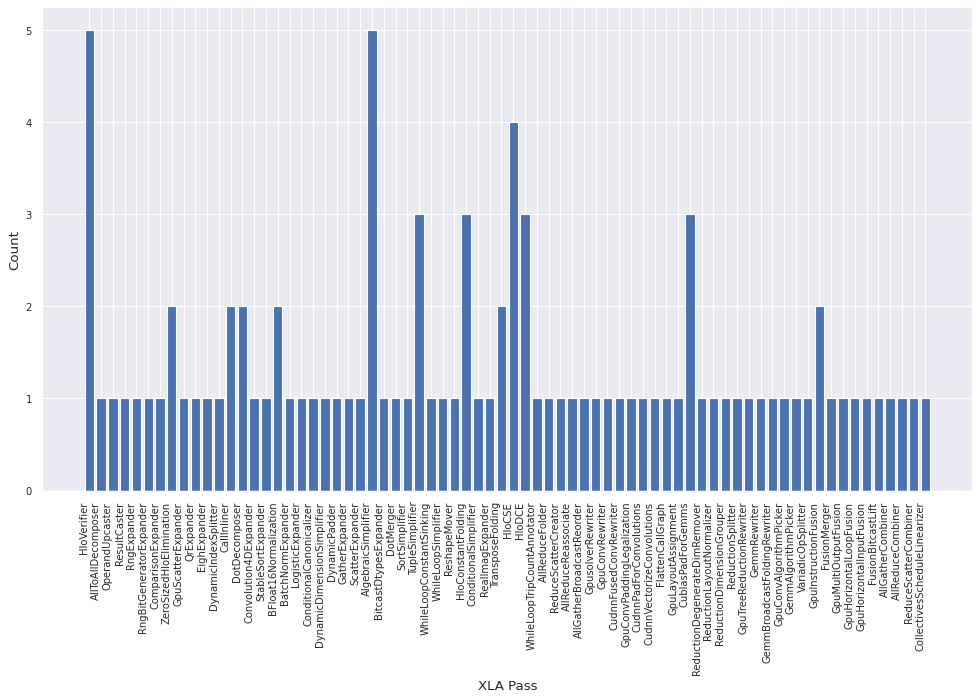

In [4]:
fig = plt.figure(num=1, figsize=(15, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.bar(wordcount.keys(), wordcount.values())
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(12)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(9)
xlabels = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(xlabels))
ax.set_xticklabels(wordcount.keys(), rotation=90, ha='right')

plt.xlabel('XLA Pass')
plt.ylabel('Count')
plt.show()

In [5]:
pass_arrs = passes.split(',')
len(pass_arrs)

97

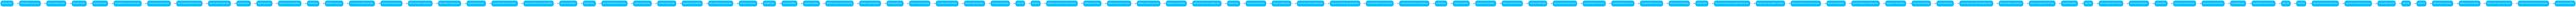

In [6]:
from graphviz import Digraph
from IPython.display import Image

dot = Digraph("XLA Pass Calling Process", 'comment', None, None, 'png', None, "UTF-8",
           {'rankdir':'LR'},
           {'color': '#00BFFF', 'fontcolor':'white', 'fontname': 'YaHei Consolas', 'fontsize': '12', 'style':'rounded,filled', 'shape':'box'},
           {'color': '#999999', 'fontcolor': '#888888', 'fontsize': '10', 'fontname':'YaHei Consolas'}, None, False)

edges = []
for i, p in enumerate(pass_arrs):
    dot.node(str(i), p)
    if i < len(pass_arrs) - 1:
        edges.append((str(i), str(i+1)))
for i, j in edges:
    dot.edge(i, j)
# print(dot.source)
dot.format = 'png'
dot.view(filename='digraph', directory='./', quiet_view=True)
Image('digraph.png')

In [7]:
pass_set=set(pass_arrs)
len(pass_set)

72

In [8]:
for p in sorted(pass_set):
    print(p, end=',')

AlgebraicSimplifier,AllGatherBroadcastReorder,AllGatherCombiner,AllReduceCombiner,AllReduceFolder,AllReduceReassociate,AllToAllDecomposer,BFloat16Normalization,BatchNormExpander,BitcastDtypesExpander,CallInliner,CollectivesScheduleLinearizer,ComparisonExpander,ConditionalCanonicalizer,ConditionalSimplifier,Convolution4DExpander,CublasPadForGemms,CudnnFusedConvRewriter,CudnnPadForConvolutions,CudnnVectorizeConvolutions,DotDecomposer,DotMerger,DynamicDimensionSimplifier,DynamicIndexSplitter,DynamicPadder,EighExpander,FlattenCallGraph,FusionBitcastLift,FusionMerger,GatherExpander,GemmAlgorithmPicker,GemmBroadcastFoldingRewriter,GemmRewriter,GpuConvAlgorithmPicker,GpuConvPaddingLegalization,GpuConvRewriter,GpuHorizontalInputFusion,GpuHorizontalLoopFusion,GpuInstructionFusion,GpuLayoutAssignment,GpuMultiOutputFusion,GpuScatterExpander,GpuTreeReductionRewriter,GpusolverRewriter,HloCSE,HloConstantFolding,HloDCE,HloVerifier,LogisticExpander,OperandUpcaster,QrExpander,RealImagExpander,ReduceSca

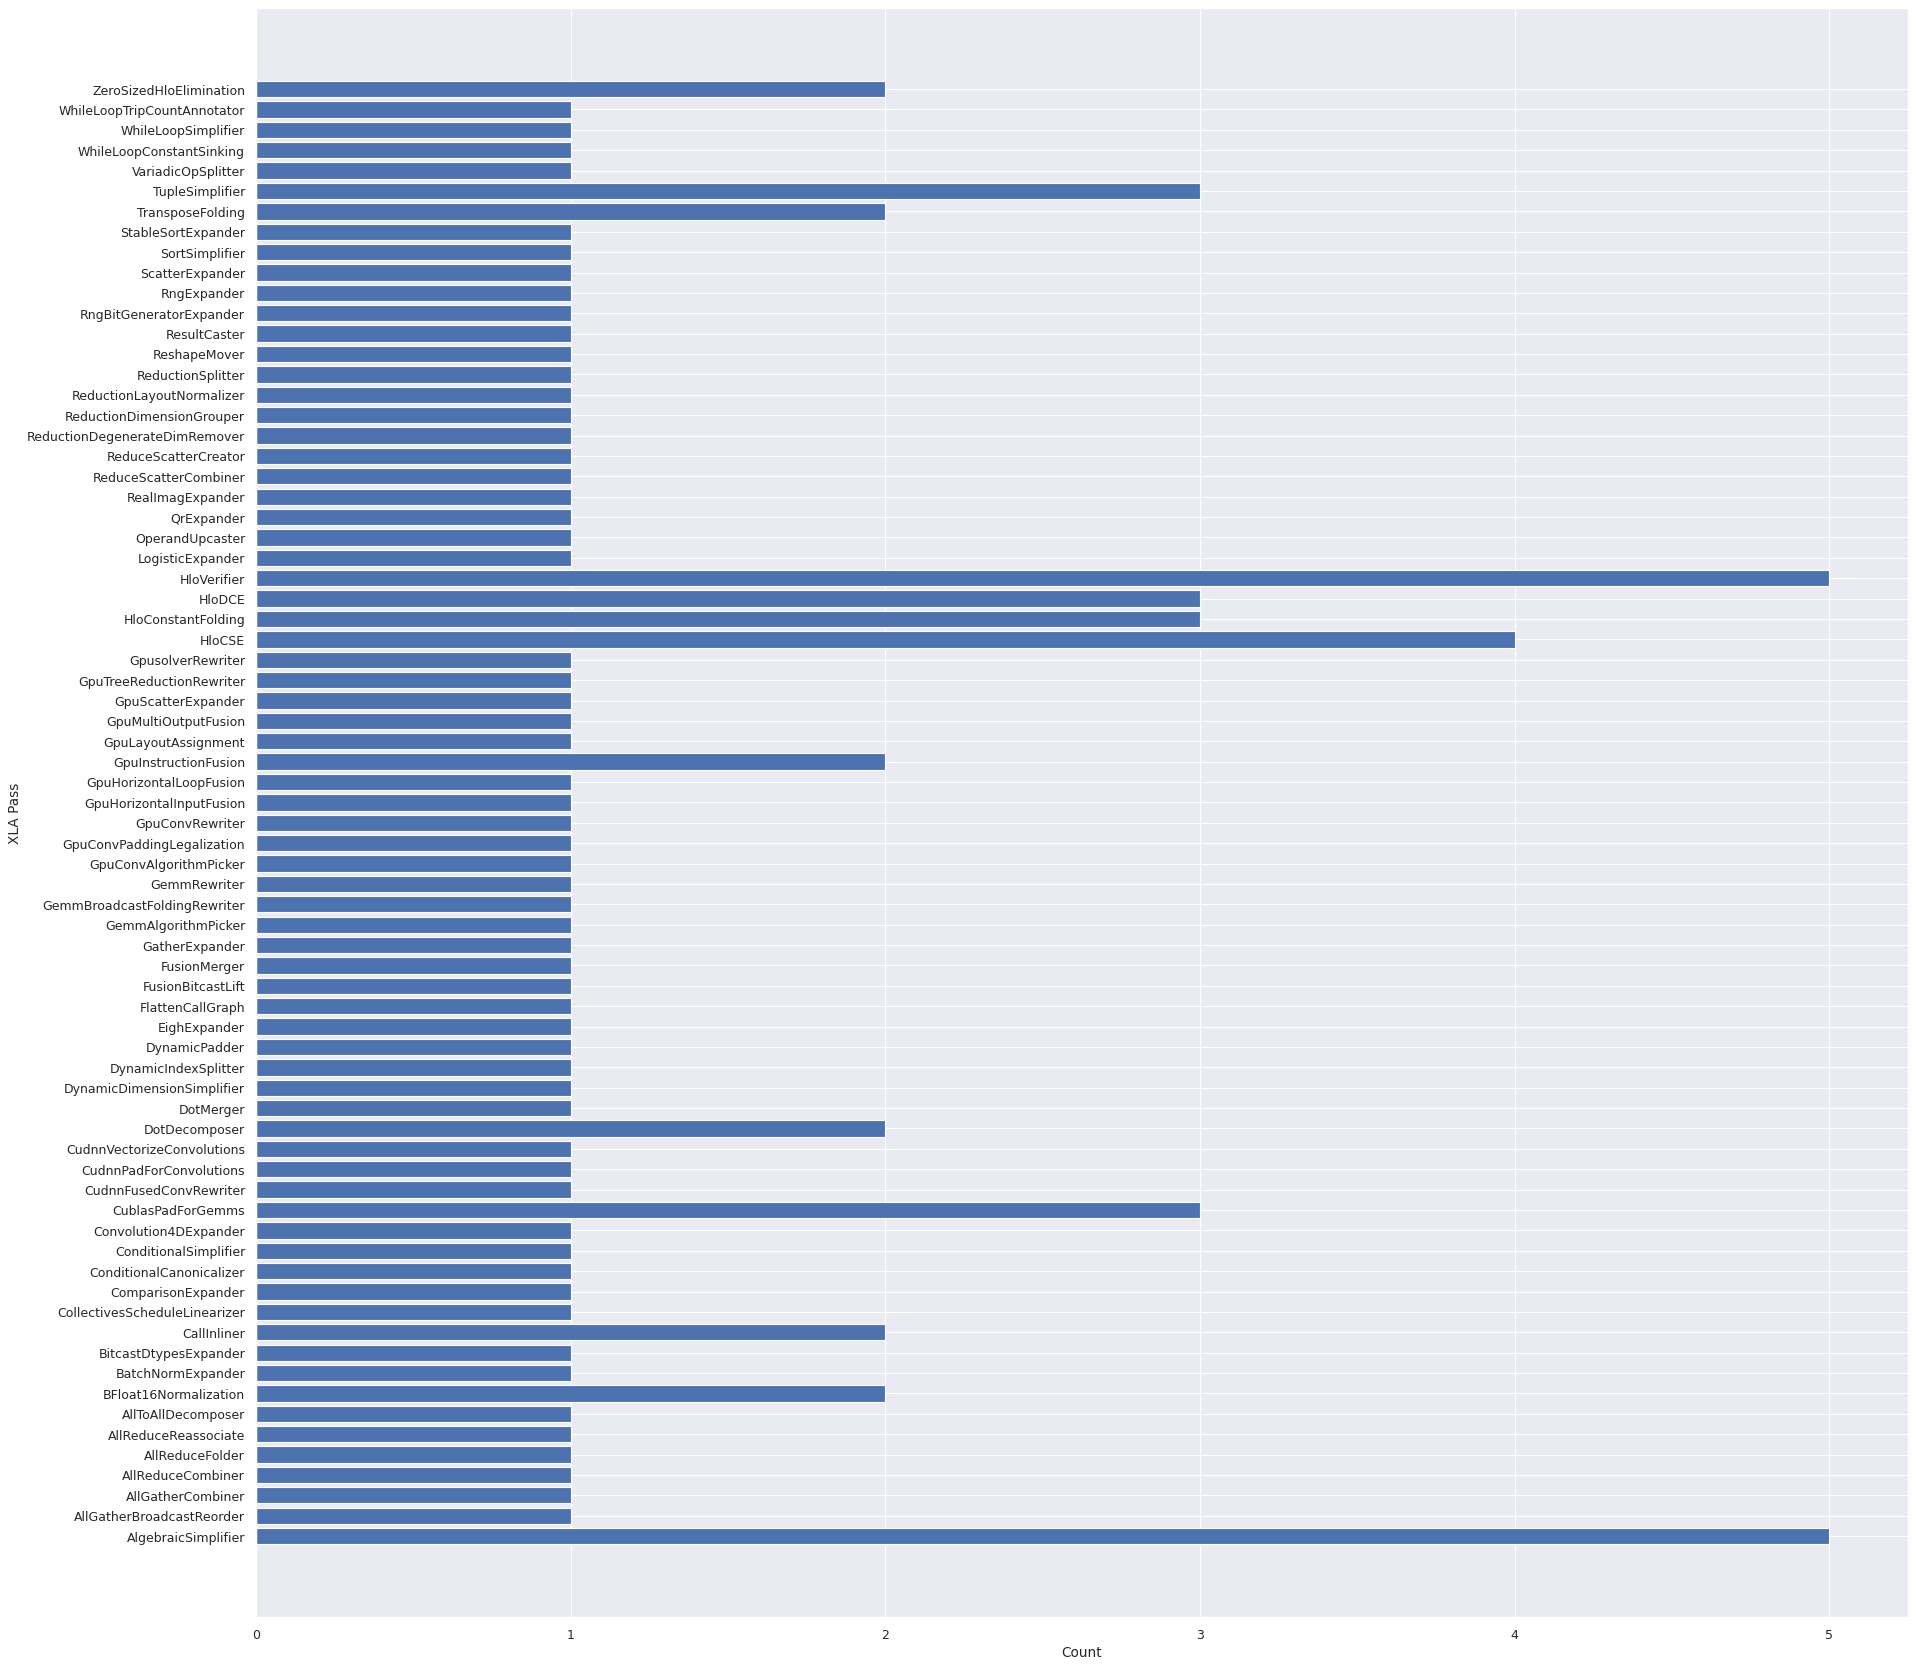

In [9]:
pass_values = sorted(wordcount.keys())
counts = [wordcount.get(k) for k in pass_values]
fig = plt.figure(num=1, figsize=(26, 26), dpi=82)
ax = fig.add_subplot(1, 1, 1)
ax.barh(pass_values, counts)
# for item in [ax.xaxis.label, ax.yaxis.label]:
#     item.set_fontsize(12)
# for item in (ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(9)
# ylabels = ax.get_yticks()
# ax.yaxis.set_major_locator(mticker.FixedLocator(ylabels))
# ax.set_yticklabels(pass_values, rotation=0, ha='right')

plt.xlabel('Count')
plt.ylabel('XLA Pass')
plt.show()
# plt.savefig("xla_pass_count.svg", format="svg")
# plt.savefig("xla_pass_count.png", format="png")

In [10]:
file_path=r'/work/study/tensorflow-release/tf-gdb/xla_pass_0106.csv'
# file_path=r'/work/study/tensorflow-release/tf-gdb/xla_pass_0106_gpusum.csv'
perf_data = pd.read_csv(file_path, sep=',', header=None)

In [11]:
y_label = 'GPU Kernel Cost Time(ms)'
perf_data.columns = ['Disable Pass', y_label]
# percent_data = perf_data.rename(columns={y_label:'Speedup Ratio'})
baseline = perf_data[y_label][0]
perf_data['Speedup Ratio'] = perf_data[y_label].map(lambda x: baseline / x)
print(len(perf_data))

70


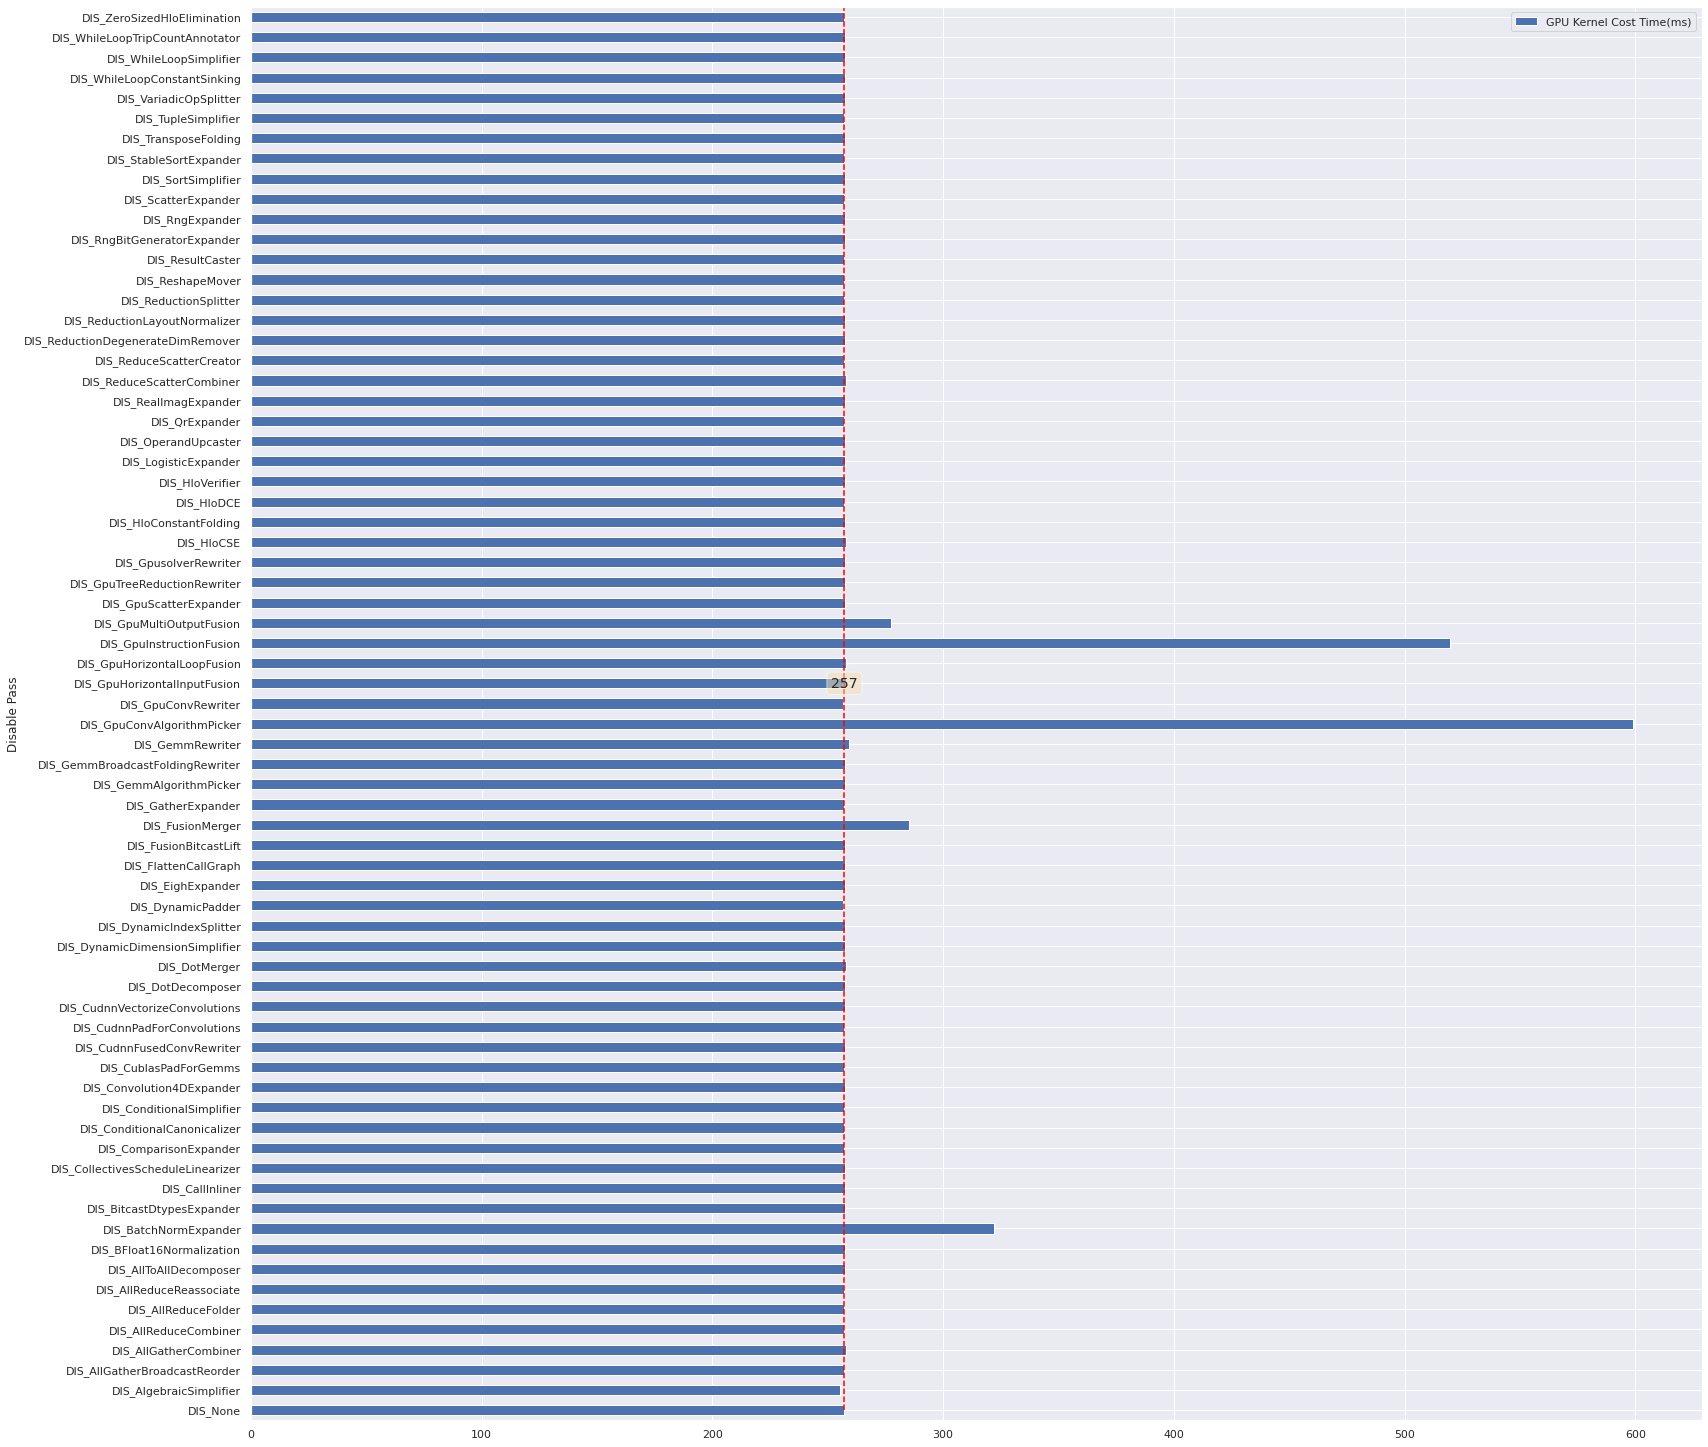

In [12]:
ax = perf_data.plot(kind='barh', x='Disable Pass', y=y_label)
plt.vlines(x=baseline, ymin=0, ymax=100, linestyles="dashed", colors='red')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(baseline, 36, "{:.0f}".format(baseline), fontsize=14,
    horizontalalignment='center', verticalalignment='center', bbox=props)
plt.show()
# plt.savefig("xla_dis_pass_time.svg", format="svg")
# plt.savefig("xla_dis_pass_time.png", format="png")

DIS_BatchNormExpander
DIS_FusionMerger
DIS_GpuConvAlgorithmPicker
DIS_GpuInstructionFusion
DIS_GpuMultiOutputFusion


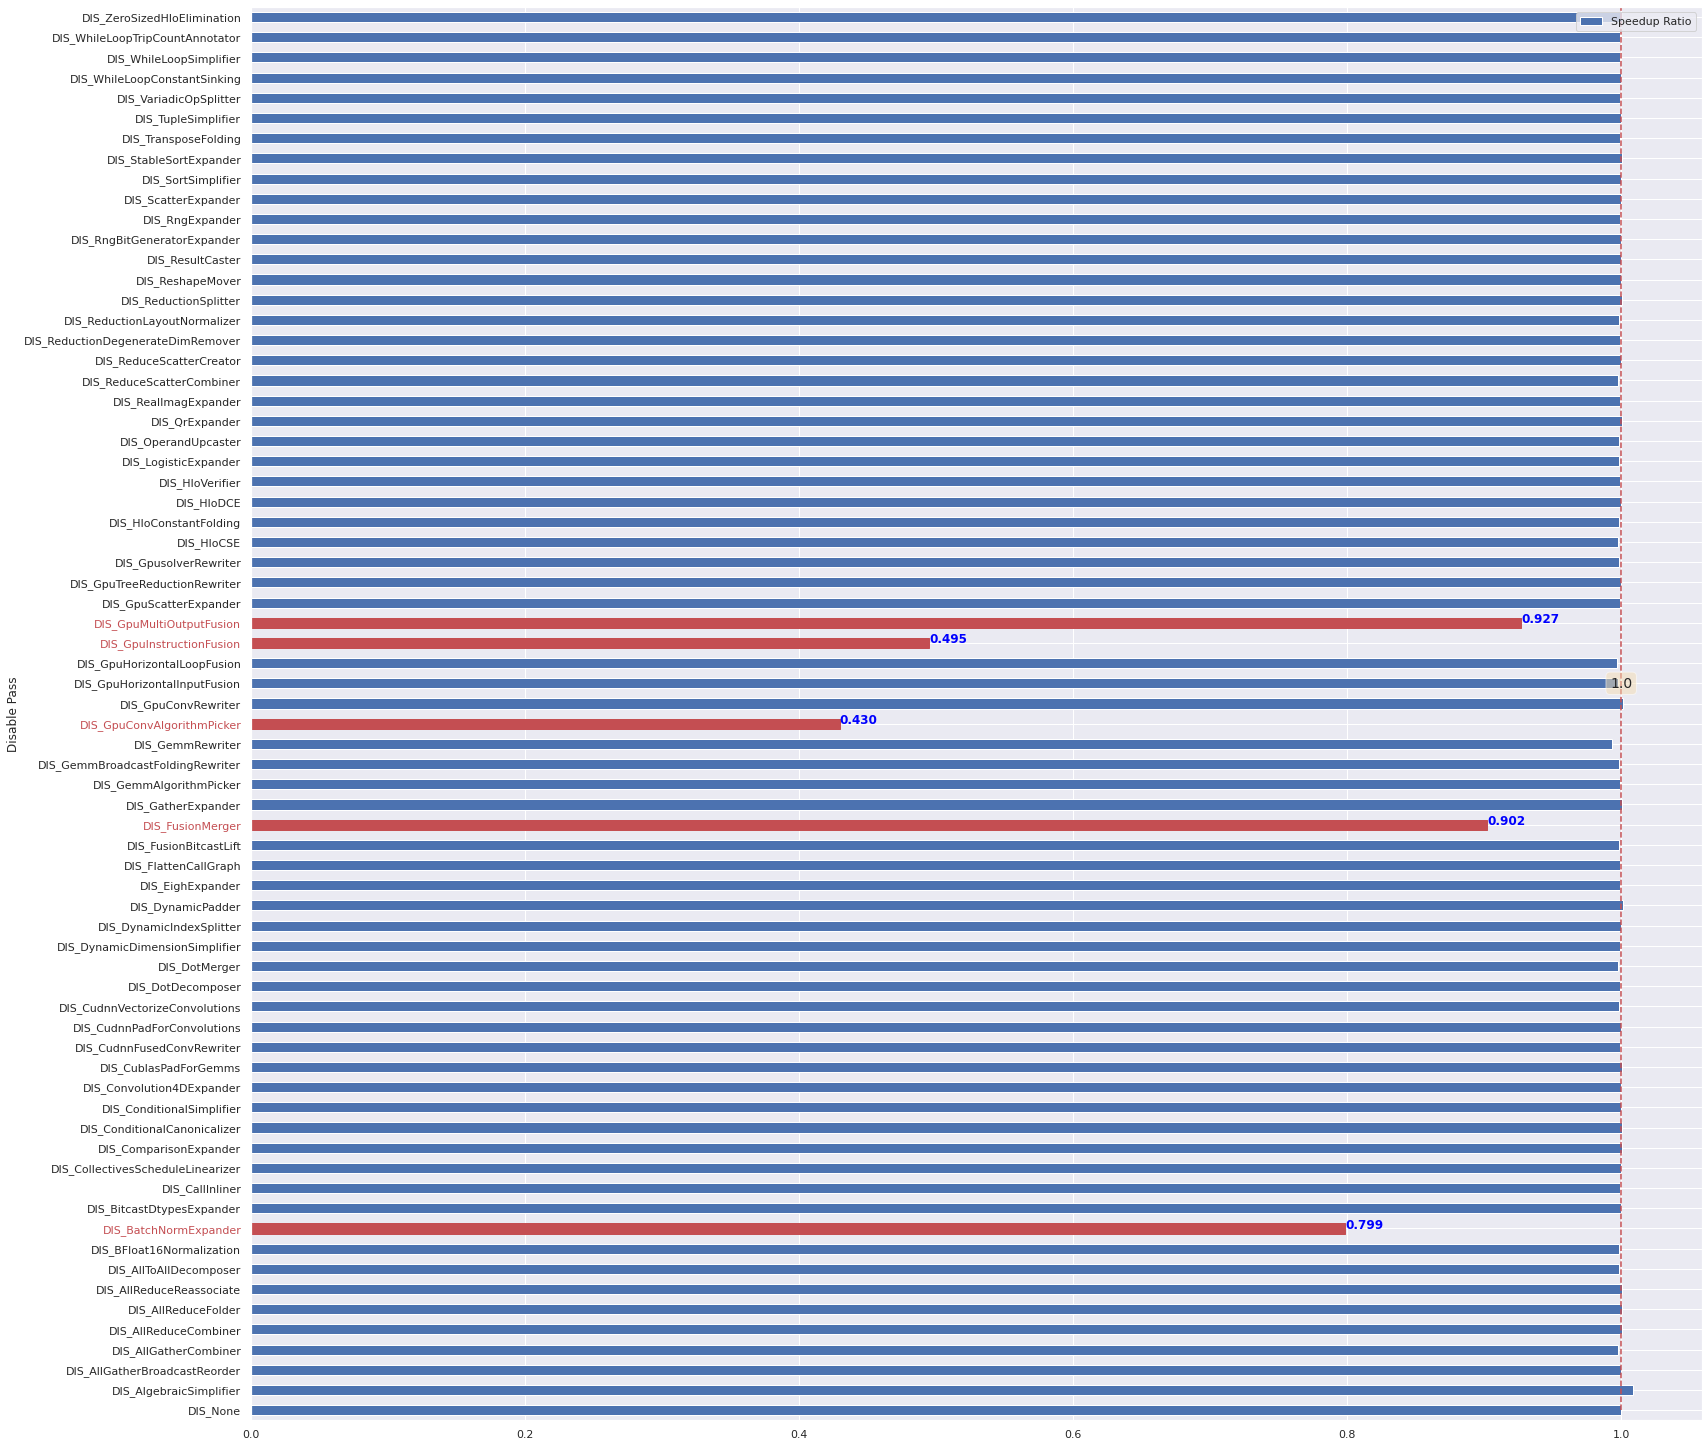

In [13]:
speedup_data = perf_data.copy()
speedup_data.index = perf_data['Disable Pass'].tolist()
ax = speedup_data.plot(kind='barh', x='Disable Pass', y='Speedup Ratio')
highlighted = []
for index, item in enumerate(ax.get_yticklabels()):
    if speedup_data['Speedup Ratio'][item.get_text()] < 0.99:
        item.set_color('r')
        highlighted.append((index, speedup_data['Speedup Ratio'][item.get_text()]))
        print(item.get_text())
ylabels = ax.get_yticks()
ax.yaxis.set_major_locator(mticker.FixedLocator(ylabels))
ax.set_yticklabels(speedup_data['Disable Pass'].tolist())

for v in highlighted:
    ax.get_children()[v[0]].set_color('r')
    ax.text(v[1], v[0], "{:.3f}".format(v[1]), color='blue', fontweight='bold')

plt.vlines(x=1.0, ymin=0, ymax=100, linestyles="dashed", colors='r')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1.0, 36, "{:.1f}".format(1.0), fontsize=14,
    horizontalalignment='center', verticalalignment='center', bbox=props)
plt.show()
# plt.savefig("xla_dis_pass_percent_1.svg", format="svg")
# plt.savefig("xla_dis_pass_percent_1.png", format="png")

In [14]:
print_pass = {p[4:] for p in perf_data['Disable Pass']}
for p in pass_set:
    if p != 'None' and p not in print_pass:
        print(p)

ReductionDimensionGrouper
GpuConvPaddingLegalization
GpuLayoutAssignment
